# <span style="color:#336699">CAP-351 - Neurocomputação
<hr style="border:1px solid #0077b9;">

Professor:
- Mascos G. Quiles

Discente:
- Camila P. Sales

## Atividade

- Realizar testes com 3(ou mais) datasets selecionados do repositório da UCI (iris, etc...) para várias configuração da rede
- Ilustrar graficamente o processo de aprendizagem pela redução do erro quadrático médio
- Dividir o conjunto em duas partes (Treino e Validação)
- Entregar um relatório descrevendo os experimentos

### Considerar
- Impacto do termo de momentum
<br>
- Impacto da regularização L2

#### Datasets selecionados
 - Detecção de ocupação https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#
 - Padrão de clientes de cartão de crédito https://archive.ics.uci.edu/ml/machine-learning-databases/00350/
 - Avila https://archive.ics.uci.edu/ml/datasets/Avila

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from livelossplot.keras import PlotLossesCallback
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras import regularizers


Using TensorFlow backend.


In [3]:
df = pd.read_csv( "./data.csv", sep="   " , header = None);
df.head()

C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8
0,1,1,1,1,1,1,2,1,20
1,1,1,1,1,1,2,2,2,21
2,1,1,1,1,1,3,1,1,15
3,1,1,2,1,1,4,1,1,12
4,1,1,1,1,1,5,1,2,16


In [4]:
X = df.drop(8,axis=1)
y = df[8].to_numpy()

# Dividir os dados em conjuntos de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
plot_losses = PlotLossesCallback()

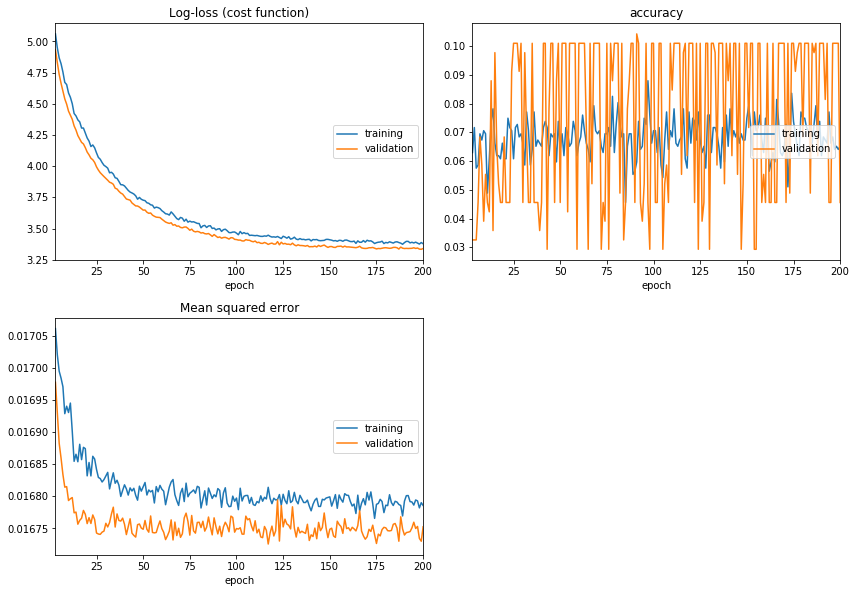

Log-loss (cost function):
training   (min:    3.374, max:    5.512, cur:    3.378)
validation (min:    3.334, max:    5.207, cur:    3.341)

accuracy:
training   (min:    0.023, max:    0.088, cur:    0.065)
validation (min:    0.029, max:    0.104, cur:    0.046)

Mean squared error:
training   (min:    0.017, max:    0.017, cur:    0.017)
validation (min:    0.017, max:    0.017, cur:    0.017)
307/307 [==============================] - 0s 13us/step


In [8]:
model = Sequential()

model.add(Dense(64, input_dim=8, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(57, activation='softmax',kernel_regularizer=regularizers.l2(0.01)))


sgd = SGD(lr=0.01, decay=1e-6, momentum=0.60, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy','mean_squared_error'
])

history = model.fit(X_train, y_train,
          epochs=200,
          validation_data=(X_test, y_test),
          callbacks=[plot_losses],
          verbose=0)
score = model.evaluate(X_test, y_test, batch_size=128)